In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import and Read Data.

In [296]:
#Read data
path = '/content/supermarket_sales.csv'
df = pd.read_csv(path, encoding = "Latin-1")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#1. Cecking and cleaning dataset

In [297]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [298]:
df.duplicated(subset=None, keep='first')
#No data duplicate

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [299]:
df.isna().sum()
#No data Null

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [300]:
df['Date']=pd.to_datetime(df['Date'])
df.info()
#Change type data Date to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

#2. Data branch and Data product.




In [301]:
df[['Invoice ID', 'Branch', 'Rating']].sort_values('Rating', ascending=False)
#Branch data that has the highest rating

,Invoice ID,Branch,Rating
387,725-56-0833,A,10.0
159,423-57-2993,B,10.0
853,866-70-2814,B,10.0
62,347-34-2234,B,10.0
60,285-68-5083,C,10.0
...,...,...,...
379,182-69-8360,B,4.0
848,845-94-6841,C,4.0
643,131-15-8856,C,4.0
328,730-61-8757,B,4.0


In [302]:
df[['Invoice ID', 'Product line', 'gross income']].sort_values('gross income', ascending=False)
#Bproduct line data that has the highest gross income

,Invoice ID,Product line,gross income
350,860-79-0874,Fashion accessories,49.6500
167,687-47-8271,Fashion accessories,49.4900
557,283-26-5248,Food and beverages,49.2600
699,751-41-9720,Home and lifestyle,48.7500
996,303-96-2227,Home and lifestyle,48.6900
...,...,...,...
402,236-86-3015,Home and lifestyle,0.6990
443,192-98-7397,Fashion accessories,0.6390
223,279-62-1445,Fashion accessories,0.6270
629,308-39-1707,Fashion accessories,0.6045


#3. Pie chart comparing the number of male and female buyers.

In [303]:
df['Gender'].value_counts()
#number of male and female buyers

Female    501
Male      499
Name: Gender, dtype: int64

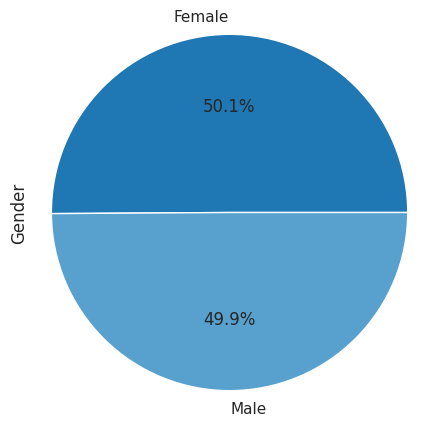

In [304]:
buyers = df['Gender'].value_counts()
buyers.plot(kind='pie', figsize=(4,4), autopct='%.1f%%')
plt.axis('equal')
plt.show()
#Comparison of male and female buyers

#4. Overall sales revenue.

In [305]:
df['Revenue'] = df['Unit price'] * df['Quantity']
total_revenue = df['Revenue'].sum()
print(total_revenue)
#Show total revenue

307587.38


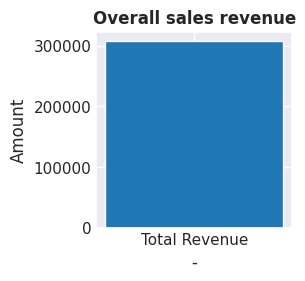

In [306]:
plt.bar('Total Revenue', total_revenue,)
plt.title("Overall sales revenue", fontsize=12, fontweight='bold')
plt.xlabel('-')
plt.ylabel('Amount')
plt.show()
#Show bar chart